In [2]:
# importing libraries
import numpy as np
import math
import scipy as sc
import pandas_datareader as pdr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


C:\Users\ayush\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import torch
import torch.nn as nn

In [4]:
pip install scipy

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ayush\\AppData\\Local\\Temp\\pip-uninstall-lo3e2p9u\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [47]:
# getting nescafe stock dataset from tiingo using api key
key='bab6f11af6d79d58a441608e2b70070d128f2e09'
df=pdr.get_data_tiingo('NSRGF', api_key=key)

C:\Users\ayush\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [48]:
df = pd.read_csv('NSRGF.csv')

In [76]:
#insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1256 non-null   object             
 1   date         1256 non-null   datetime64[ns, UTC]
 2   close        1256 non-null   float64            
 3   high         1256 non-null   float64            
 4   low          1256 non-null   float64            
 5   open         1256 non-null   float64            
 6   volume       1256 non-null   int64              
 7   adjClose     1256 non-null   float64            
 8   adjHigh      1256 non-null   float64            
 9   adjLow       1256 non-null   float64            
 10  adjOpen      1256 non-null   float64            
 11  adjVolume    1256 non-null   int64              
 12  divCash      1256 non-null   float64            
 13  splitFactor  1256 non-null   float64            
dtypes: datetime64[ns, UTC](1

In [50]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NSRGF,2018-09-07 00:00:00+00:00,82.9400,83.54,82.57,82.67,3403,73.251077,73.780986,72.924299,73.012618,3403,0.0,1.0
1,NSRGF,2018-09-10 00:00:00+00:00,83.2100,83.77,83.20,83.20,3085,73.489536,73.984117,73.480704,73.480704,3085,0.0,1.0
2,NSRGF,2018-09-11 00:00:00+00:00,82.8575,83.37,82.60,82.95,5128,73.178214,73.630845,72.950795,73.259908,5128,0.0,1.0
3,NSRGF,2018-09-12 00:00:00+00:00,83.4800,84.25,83.17,83.17,5894,73.727995,74.408044,73.454208,73.454208,5894,0.0,1.0
4,NSRGF,2018-09-13 00:00:00+00:00,84.0600,84.73,83.66,84.73,6285,74.240240,74.831972,73.886967,74.831972,6285,0.0,1.0


In [51]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.0
mean,112.684967,114.076850,111.667132,112.779662,17862.102707,106.110189,107.426804,105.147141,106.199716,17862.102707,0.011558,1.0
std,13.258019,13.579441,12.958551,13.278742,53638.949408,15.337263,15.670878,15.039709,15.357563,53638.949408,0.183764,0.0
min,78.880000,80.020000,78.570000,79.290000,568.000000,69.665360,70.672187,69.391573,70.027464,568.000000,0.000000,1.0
25%,105.948500,107.250000,105.000000,106.250000,4108.250000,96.723055,97.635114,96.061382,96.761403,4108.250000,0.000000,1.0
50%,115.327000,116.500000,113.995000,115.312500,6617.000000,109.010517,110.408323,108.041297,108.889625,6617.000000,0.000000,1.0
75%,121.425500,123.000000,120.260750,121.570075,12393.500000,118.579962,120.022330,117.396602,118.656191,12393.500000,0.000000,1.0
max,142.040000,143.918000,140.430000,142.860000,848148.000000,135.463932,137.254985,133.928470,136.245968,848148.000000,3.307000,1.0


In [52]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [53]:
#filtering out required fields
data=df[['date','close']]

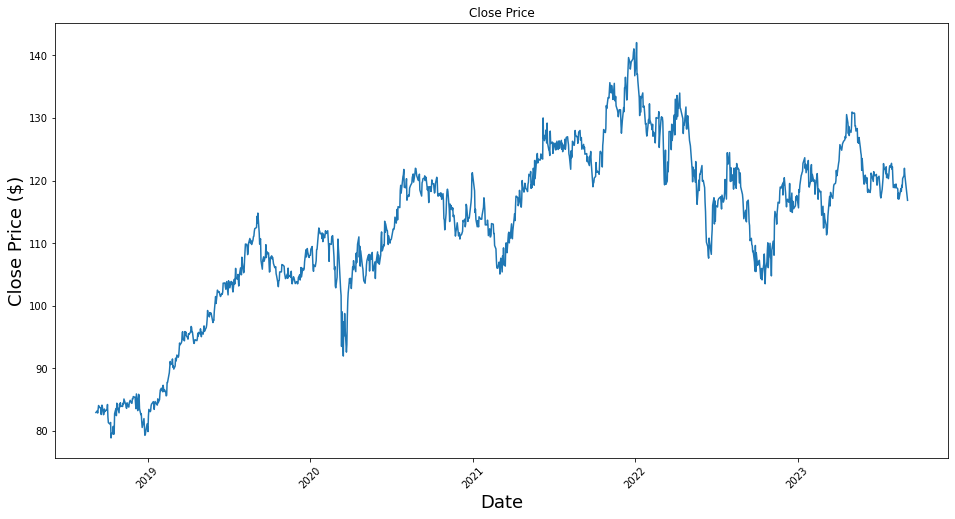

In [54]:
#plotting the graph between date and close for data visualisation
import matplotlib.dates as mdates 
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['date'],df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
years = mdates.YearLocator()  
date_format = mdates.DateFormatter('%Y')  
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.show()

In [55]:
data=df.filter(['close'])
dataset = data.values
training_data_len=math.ceil(len(dataset) * .8)
training_data_len

1005

In [56]:
#normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.06428119],
       [0.06855605],
       [0.06297498],
       ...,
       [0.65310323],
       [0.64031032],
       [0.6010133 ]])

In [57]:
#training data
train_data=scaled_data[0:training_data_len , :]
train_x = []
train_y = []
for i in range(60, len(train_data)):
    train_x.append(train_data[i-60:i,0])
    train_y.append(train_data[i, 0])
    if i<=60:
        print(train_x)
        print(train_y)

[array([0.06428119, 0.06855605, 0.06297498, 0.07283091, 0.08201393,
       0.07837239, 0.07568081, 0.07552248, 0.05921469, 0.08233059,
       0.08264725, 0.05873971, 0.06032299, 0.07314756, 0.06649778,
       0.06792274, 0.07124763, 0.069981  , 0.08454718, 0.05288157,
       0.03863205, 0.03546548, 0.03594047, 0.03910703, 0.        ,
       0.01155795, 0.01029132, 0.02929069, 0.00934136, 0.010133  ,
       0.06127296, 0.07425586, 0.05636479, 0.08787207, 0.07884737,
       0.07568081, 0.06348955, 0.08533882, 0.07868904, 0.08898037,
       0.07963901, 0.08090564, 0.07948068, 0.0880304 , 0.08533882,
       0.09848005, 0.08755541, 0.08549715, 0.07742242, 0.07473084,
       0.08898037, 0.07884737, 0.07805573, 0.08898037, 0.09515516,
       0.08787207, 0.08771374, 0.09927169, 0.09832172, 0.10465484])]
[0.10291323622545923]


In [58]:
train_x, train_y = np.array(train_x), np.array(train_y)

In [59]:
train_x=np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_x.shape

(945, 60, 1)

In [60]:
#building the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_x.shape[1], 1 )))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [61]:
model.compile(optimizer='adam', loss='mse')

In [62]:
model.fit(train_x, train_y, batch_size=1, epochs=1)

945/945 [==============================] - 23s 20ms/step - loss: 0.0040


In [63]:
#testing data
test_data = scaled_data[training_data_len-60: , :]
test_x=[]
test_y=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    test_x.append(test_data[i-60:i, 0])
    

In [64]:
test_x=np.array(test_x)

In [65]:
test_x=np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [66]:
#predicting using trained model
predictions=model.predict(test_x)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 13ms/step


In [70]:
#checking values like root mean square and mean absolute error
rmse=np.sqrt(np.mean(predictions - test_y)**2)
rmse

1.4066133454463396

In [71]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, predictions)
mae

2.0571805371288288

In [72]:
data=df[['date','close']]

C:\Users\ayush\AppData\Local\Temp/ipykernel_7120/1878946591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


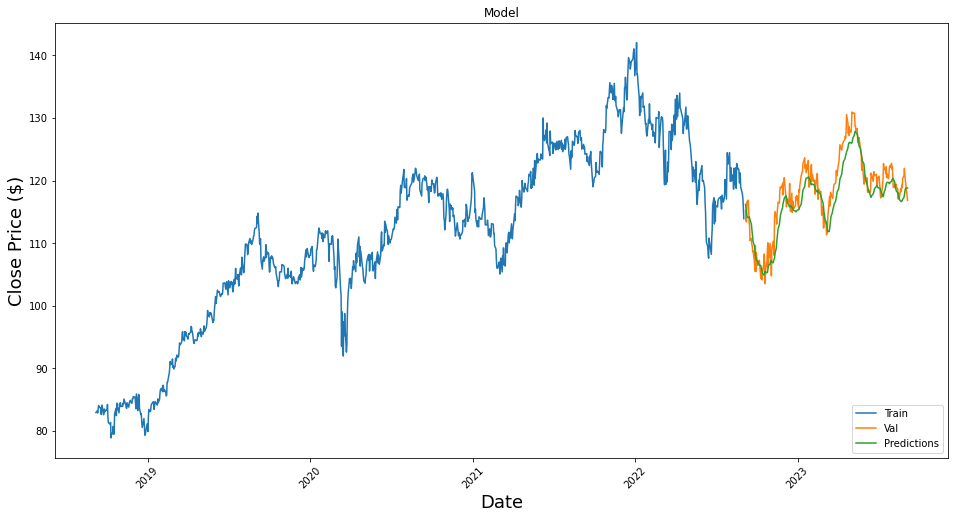

In [73]:
#plotting the trained and predicted data
import matplotlib.dates as mdates
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
years = mdates.YearLocator()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)

plt.plot(train['date'], train['close'], label='Train')
plt.plot(valid['date'], valid['close'], label='Val')
plt.plot(valid['date'], valid['Predictions'], label='Predictions')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

In [74]:
#checking predicted data with actually close data
valid

,date,close,Predictions
1005,2022-09-06 00:00:00+00:00,115.250,116.200874
1006,2022-09-07 00:00:00+00:00,113.645,115.538933
1007,2022-09-08 00:00:00+00:00,113.405,114.855408
1008,2022-09-09 00:00:00+00:00,116.600,114.222153
1009,2022-09-12 00:00:00+00:00,116.870,114.046989
...,...,...,...
1251,2023-08-29 00:00:00+00:00,121.960,117.699478
1252,2023-08-30 00:00:00+00:00,120.816,118.224030
1253,2023-08-31 00:00:00+00:00,120.130,118.615906
1254,2023-09-01 00:00:00+00:00,119.322,118.817802
